# In this file we are going to use Functional API

In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-11-08 20:40:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   222MB/s    in 0.7s    

2023-11-08 20:40:32 (222 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [6]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [7]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [8]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
# Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="Input_layer")

x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="Global_Avg_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="Output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.legacy.Adam(),
               metrics=["accuracy"])

history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data_10_percent,
                        validation_steps=int(0.25 * len(test_data_10_percent)))
                # we are only validating 25% data just for it to be quicker optional

24274472/24274472 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Epoch 1/5
24/24 [==============================] - 27s 401ms/step - loss: 1.9385 - accuracy: 0.3733 - val_loss: 1.3596 - val_accuracy: 0.7237
Epoch 2/5
24/24 [==============================] - 5s 174ms/step - loss: 1.1724 - accuracy: 0.7360 - val_loss: 0.9166 - val_accuracy: 0.8059
Epoch 3/5
24/24 [==============================] - 3s 127ms/step - loss: 0.8671 - accuracy: 0.7973 - val_loss: 0.7333 - val_accuracy: 0.8438
Epoch 4/5
24/24 [==============================] - 4s 157ms/step - loss: 0.6997 - accuracy: 0.8373 - val_loss: 0.6191 - val_accuracy: 0.8470
Epoch 5/5
24/24 [==============================] - 4s 168ms/step - loss: 0.6049 - accuracy: 0.8613 - val_loss: 0.5708 - val_accuracy: 0.8618


In [11]:
# evaluate on full test data
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 7s 82ms/step - loss: 0.5774 - accuracy: 0.8576


[0.5773924589157104, 0.8575999736785889]

In [12]:
# checking layer in base model
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [13]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 Global_Avg_pooling_layer (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 Output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


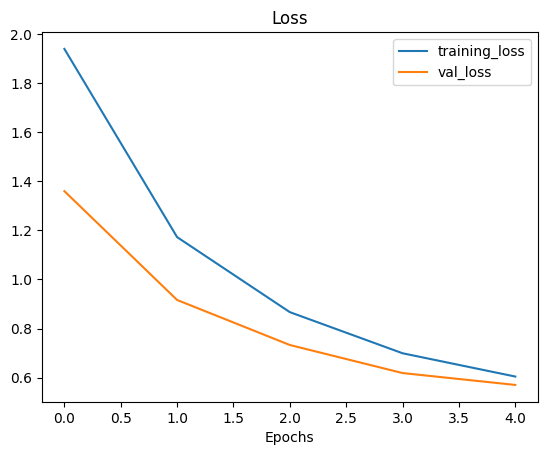

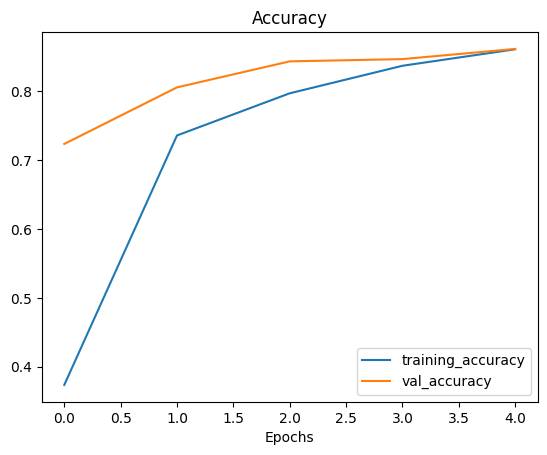

In [15]:
plot_loss_curves(history_0)

In [16]:
# Define input tensor shape (same number of dimensions as the output of efficientnetv2-b0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [17]:
# lets replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [18]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-11-08 20:41:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   188MB/s    in 0.7s    

2023-11-08 20:41:49 (188 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [19]:
unzip_data("10_food_classes_1_percent.zip")

In [20]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir_1_percent = "10_food_classes_1_percent/test/"

In [21]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'

In [22]:
import tensorflow as tf

Image_size = (224,224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           image_size=Image_size,
                                                                           label_mode="categorical",
                                                                           batch_size=32)

test_data_1_percent= tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                           image_size=Image_size,
                                                                           label_mode="categorical")


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [23]:
# data Augmentation
tf.__version__

'2.14.0'

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

Augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
    # layers.Rescaling(1/255.) to scale image but we dont need it as we are working with efficientNet which is alredy scaled
], name="data_augmentation")

[[[ 9 20 24]
  [ 9 20 24]
  [ 8 19 23]
  ...
  [25 17  6]
  [26 16  6]
  [24 14  4]]

 [[10 21 25]
  [ 8 19 23]
  [ 7 18 22]
  ...
  [22 14  3]
  [23 13  3]
  [21 11  1]]

 [[ 9 20 24]
  [ 7 18 22]
  [ 5 16 18]
  ...
  [23 15  4]
  [24 14  4]
  [21 11  1]]

 ...

 [[13  5  3]
  [12  4  2]
  [ 8  3  0]
  ...
  [16 11  5]
  [16 12  3]
  [14 10  1]]

 [[10  4  6]
  [ 9  3  5]
  [ 6  2  1]
  ...
  [16 11  5]
  [18 11  3]
  [16  9  1]]

 [[ 9  3  5]
  [ 8  2  4]
  [ 6  2  1]
  ...
  [16 11  5]
  [18 11  3]
  [16  9  1]]]
tf.Tensor(
[[[[123.09216  112.48684  101.89508 ]
   [118.07897  107.75575   96.1661  ]
   [109.298256  99.17797   87.23638 ]
   ...
   [190.01779   73.27234   53.784904]
   [189.62347   72.907486  53.749813]
   [196.98694   79.18425   61.23383 ]]

  [[109.18732   96.5786    87.44818 ]
   [108.05085   96.22076   86.07919 ]
   [104.90395   94.30517   82.89855 ]
   ...
   [193.5673    73.26069   53.522312]
   [191.28802   70.341095  51.300697]
   [189.96788   68.349144  50.362

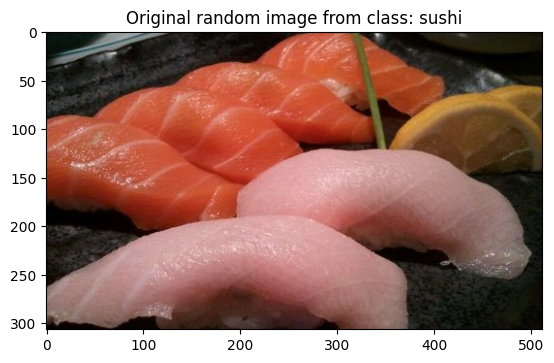

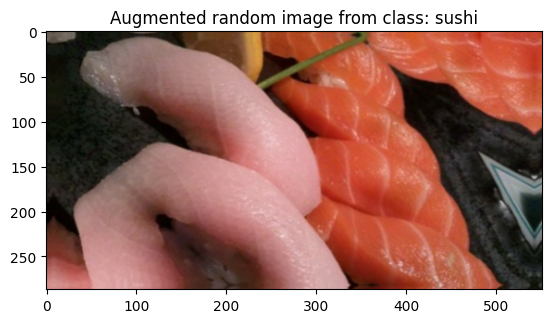

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
print(img)

# augmented img
augmented_img = Augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
print(augmented_img)

In [26]:
# feature extraction 1%
input_shape = (224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="Input_layer")

# data augmentation

x = Augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="Global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss = "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1_percent = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data=test_data_1_percent,
                        validation_steps=int(0.25 * len(test_data_1_percent)))

Epoch 1/5
3/3 [==============================] - 14s 3s/step - loss: 2.3871 - accuracy: 0.1000 - val_loss: 2.1617 - val_accuracy: 0.2204
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1672 - accuracy: 0.2571 - val_loss: 2.0565 - val_accuracy: 0.3405
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9804 - accuracy: 0.3571 - val_loss: 1.9754 - val_accuracy: 0.3964
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.8274 - accuracy: 0.3714 - val_loss: 1.8818 - val_accuracy: 0.4556
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.7509 - accuracy: 0.4857 - val_loss: 1.8084 - val_accuracy: 0.4688


In [27]:
result_1_percent_data_aug = model_1.evaluate(test_data_1_percent)
result_1_percent_data_aug

79/79 [==============================] - 5s 63ms/step - loss: 1.8218 - accuracy: 0.4544


[1.8218121528625488, 0.4544000029563904]

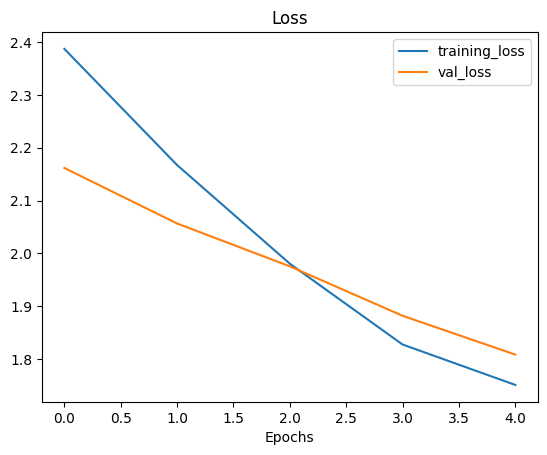

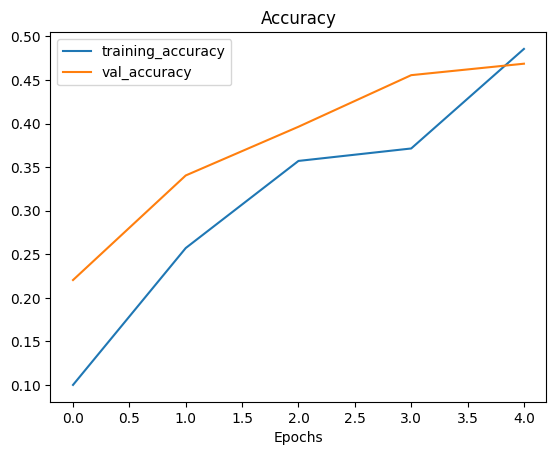

In [28]:
plot_loss_curves(history_1_percent)

In [29]:
# check point path
checkpoint_path = "ten_percent_mdoel_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [71]:
# feature extraction 1%
input_shape = (224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="Input_layer")

# data augmentation

x = Augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="Global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_10 = keras.Model(inputs, outputs)

model_10.compile(loss = "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10_percent = model_10.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data_10_percent,
                        validation_steps=int(0.25 * len(test_data_10_percent)),
                        callbacks=[checkpoint_callback])

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9997 - accuracy: 0.3720
Epoch 1: saving model to ten_percent_mdoel_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 25s 739ms/step - loss: 1.9997 - accuracy: 0.3720 - val_loss: 1.4316 - val_accuracy: 0.6612
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3930 - accuracy: 0.6400
Epoch 2: saving model to ten_percent_mdoel_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 449ms/step - loss: 1.3930 - accuracy: 0.6400 - val_loss: 0.9982 - val_accuracy: 0.7796
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0870 - accuracy: 0.7400
Epoch 3: saving model to ten_percent_mdoel_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 14s 541ms/step - loss: 1.0870 - accuracy: 0.7400 - val_loss: 0.8380 - val_accuracy: 0.7763
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9392 - accuracy: 0.

In [31]:
result_10_percent_data_aug = model_10.evaluate(test_data_10_percent)
result_10_percent_data_aug

79/79 [==============================] - 6s 64ms/step - loss: 0.6560 - accuracy: 0.8236


[0.6560161709785461, 0.8235999941825867]

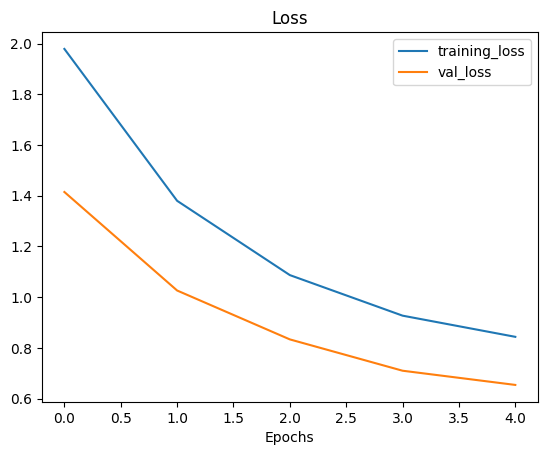

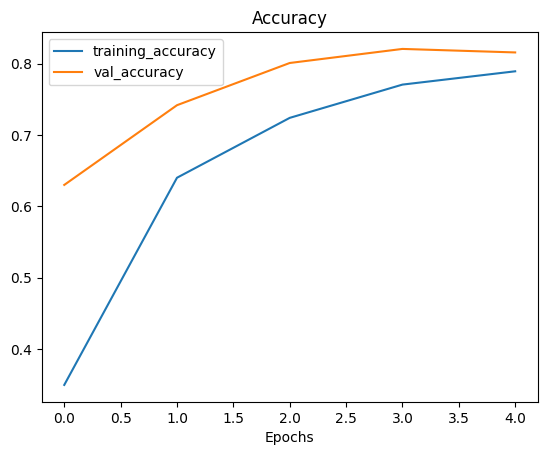

In [32]:
plot_loss_curves(history_10_percent)

In [33]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    Create a model based on EfficientNetV2B0 with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. Default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. Default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. Default is 0.001.
    - training (bool): Whether the base model is trainable. Default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = Augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

In [53]:
initial_epochs = 5

In [35]:
model_10.load_weights(checkpoint_path)

In [36]:
loaded_weights_model_results = model_10.evaluate(test_data_10_percent)

79/79 [==============================] - 6s 65ms/step - loss: 0.6560 - accuracy: 0.8236


In [37]:
result_10_percent_data_aug == loaded_weights_model_results

True

In [38]:
result_10_percent_data_aug

[0.6560161709785461, 0.8235999941825867]

In [39]:
loaded_weights_model_results

[0.6560161709785461, 0.8235999941825867]

In [40]:
# check to see if loaded model results are very close

import numpy as np
np.isclose(result_10_percent_data_aug, loaded_weights_model_results)

array([ True,  True])

In [41]:
# checking differece
print(np.array(result_10_percent_data_aug) - np.array(loaded_weights_model_results))

[0. 0.]


In [42]:
# FINE TUNING OUR MODEL

model_10.layers

In [43]:
# are these trainable
for layer in model_10.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7a64a7574a90> True
<keras.src.engine.sequential.Sequential object at 0x7a64a75b2080> True
<keras.src.engine.functional.Functional object at 0x7a64a24d3430> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7a6544d2e8c0> True
<keras.src.layers.core.dense.Dense object at 0x7a64a24d2290> True


In [44]:
# what layers are in our base model and are they trainable
for i, layer in enumerate(model_10.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [45]:
# how many trainable variables are in base model
print(len(model_10.layers[2].trainable_variables))

0


In [46]:
# to begine fine-tunnig seting last 10 layers trainable true
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False # except for last 10 layer all are not trainable Or are freeze

In [47]:
model_10.compile(loss = "categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])
# general rule of thumb is lower lr by 10X 0.001 to 0.0001 whenm fine tunning model

In [ ]:
# checing which layerss are tunable/trainable
for layer_number, layer in enumerate(model_10.layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
for i, layer in enumerate(model_10.layers[2].layers):
  print(i, layer.name, layer.trainable)

In [50]:
len(model_10.trainable_variables)

12

In [54]:
# fine tuning for another 5 epochs

fine_tune_epoch = initial_epochs + 5

history_fine_10_percent = model_10.fit(train_data_10_percent,
                                       epochs=fine_tune_epoch,
                                       steps_per_epoch=len(train_data_10_percent),
                                       validation_data=test_data_10_percent,
                                       validation_steps=int(0.25 * len(test_data_10_percent)),
                                       initial_epoch= history_10_percent.epoch[-1] # continue from last 5th epoch
                                       )

Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.7549 - accuracy: 0.7640
Epoch 5: saving model to ten_percent_mdoel_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 39s 1s/step - loss: 0.7549 - accuracy: 0.7640 - val_loss: 0.4521 - val_accuracy: 0.8536
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.4747 - accuracy: 0.8693
Epoch 6: saving model to ten_percent_mdoel_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 15s 615ms/step - loss: 0.4747 - accuracy: 0.8693 - val_loss: 0.4283 - val_accuracy: 0.8684
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.3586 - accuracy: 0.8827
Epoch 7: saving model to ten_percent_mdoel_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 489ms/step - loss: 0.3586 - accuracy: 0.8827 - val_loss: 0.4270 - val_accuracy: 0.8372
Epoch 8/10
24/24 [==============================] - ETA: 0s - loss: 0.2585 - accuracy: 0

In [56]:
results_fine_tune_10_percent = model_10.evaluate(test_data_10_percent)

79/79 [==============================] - 9s 95ms/step - loss: 0.4595 - accuracy: 0.8632


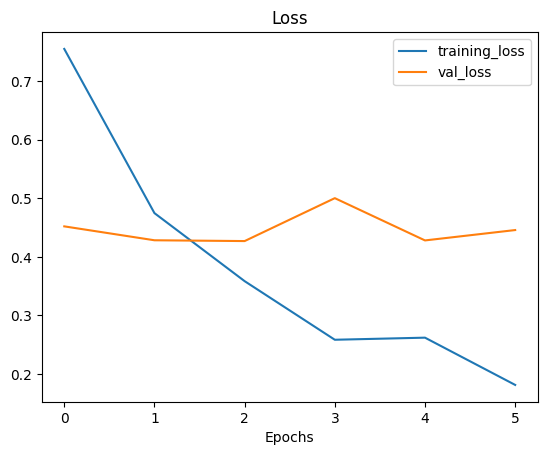

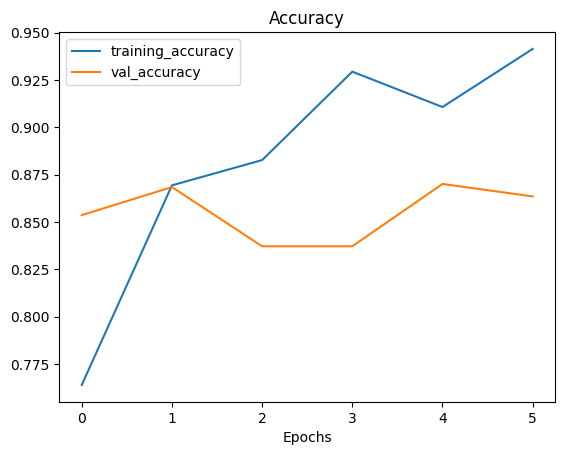

In [57]:
plot_loss_curves(history_fine_10_percent)

In [59]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.34933334589004517, 0.6399999856948853, 0.7239999771118164, 0.7706666588783264, 0.7893333435058594, 0.7639999985694885, 0.8693333268165588, 0.8826666474342346, 0.9293333292007446, 0.9106666445732117, 0.9413333535194397]


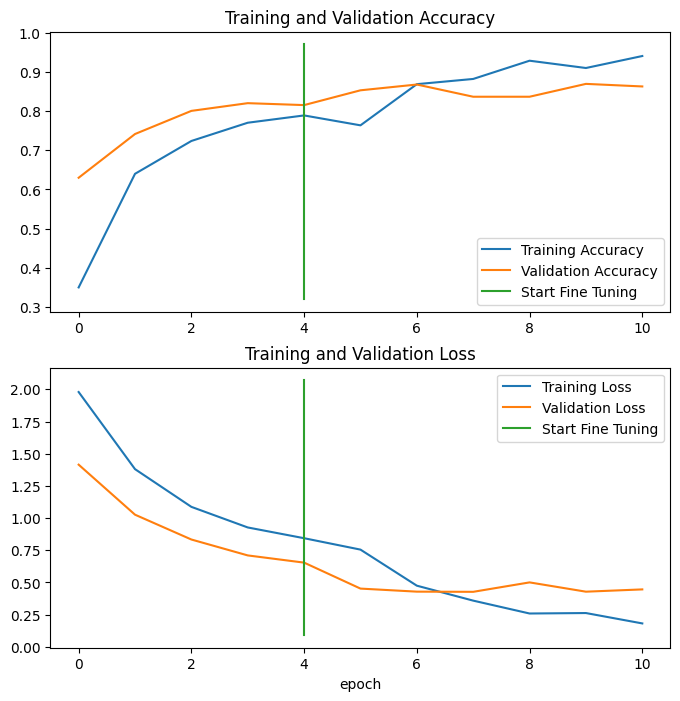

In [60]:
compare_historys(original_history=history_10_percent,
                 new_history=history_fine_10_percent,
                 initial_epochs=5)

In [61]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2023-11-08 21:11:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   106MB/s    in 6.6s    

2023-11-08 21:11:07 (75.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [62]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [63]:
model_10.evaluate(test_data)

79/79 [==============================] - 5s 62ms/step - loss: 0.4595 - accuracy: 0.8632


[0.4594770073890686, 0.8632000088691711]

In [64]:
results_fine_tune_10_percent

[0.459477037191391, 0.8632000088691711]

In [72]:
# load weights from checkpoint, that way we can fine-tune form the same stage os 10%

model_10.load_weights(checkpoint_path)

In [73]:
model_10.evaluate(test_data)

79/79 [==============================] - 6s 66ms/step - loss: 0.6410 - accuracy: 0.8356


[0.6409887075424194, 0.8356000185012817]

In [75]:
result_10_percent_data_aug

[0.6560161709785461, 0.8235999941825867]

In [77]:
model_10.compile(loss = "categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=["accuracy"])

In [78]:
history_fine_10_classes_full = model_10.fit(train_data_10_classes_full,
                                            epochs=fine_tune_epoch,
                                            steps_per_epoch=len(train_data_10_classes_full),
                                            validation_data=test_data,
                                            validation_steps=int(0.25 * len(test_data)),
                                            initial_epoch = history_10_percent.epoch[-1])

Epoch 5/10
235/235 [==============================] - 89s 345ms/step - loss: 0.8749 - accuracy: 0.7572 - val_loss: 0.6049 - val_accuracy: 0.8257
Epoch 6/10
235/235 [==============================] - 67s 283ms/step - loss: 0.8151 - accuracy: 0.7675 - val_loss: 0.5386 - val_accuracy: 0.8454
Epoch 7/10
235/235 [==============================] - 58s 244ms/step - loss: 0.7636 - accuracy: 0.7776 - val_loss: 0.5399 - val_accuracy: 0.8372
Epoch 8/10
235/235 [==============================] - 56s 234ms/step - loss: 0.7421 - accuracy: 0.7793 - val_loss: 0.5071 - val_accuracy: 0.8388
Epoch 9/10
235/235 [==============================] - 51s 216ms/step - loss: 0.7108 - accuracy: 0.7924 - val_loss: 0.5057 - val_accuracy: 0.8405
Epoch 10/10
235/235 [==============================] - 46s 190ms/step - loss: 0.6806 - accuracy: 0.7979 - val_loss: 0.4501 - val_accuracy: 0.8701


In [80]:
hh = model_10.evaluate(test_data)

79/79 [==============================] - 10s 115ms/step - loss: 0.4411 - accuracy: 0.8704


5
11
[0.3720000088214874, 0.6399999856948853, 0.7400000095367432, 0.7720000147819519, 0.7799999713897705, 0.7572000026702881, 0.76746666431427, 0.7775999903678894, 0.7793333530426025, 0.7924000024795532, 0.7978666424751282]


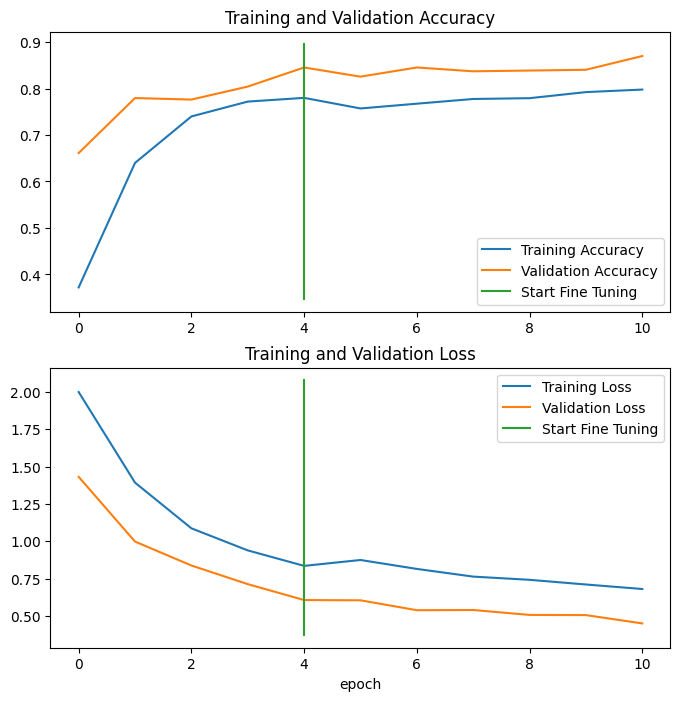

In [82]:
compare_historys(history_10_percent,history_fine_10_classes_full,initial_epochs=5)